In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns

In [122]:
fp_report = '~/Desktop/ES-Misc/Data-Python/JPPL/New-Data/jppl.csv'

In [123]:
df_report = pd.read_csv(fp_report, sep = ';')

In [124]:
df_report.head()

,Job ID,Date/Time,File Name,Printer ID,Email,Material Used (kg),Real print time (h),Estimated print time (h),Status,Material Cost ($)
0,1025020,2019-09-30 19:50:34,stopbully2_3378416.gcode,40995,jpl3dprint@jplibrary.net,0.012,1.37,1.32,Finished,0.58
1,1023315,2019-09-29 21:12:54,level3_NOMAS_3371509.gcode,48700,tulanearchitecture@gmail.com,0.000,0.00,15.91,Aborted,0.00
2,1023313,2019-09-29 21:11:59,Box_testPrint_3372547.gcode,48700,tulanearchitecture@gmail.com,0.000,0.04,29.53,Aborted,0.00
3,1023070,2019-09-29 16:25:04,level3_NOMAS_3371509.gcode,48623,tulanearchitecture@gmail.com,0.116,15.82,15.91,Finished,10.12
4,1022840,2019-09-29 04:32:09,level5_NOMAS_3370596.gcode,48619,tulanearchitecture@gmail.com,0.051,5.29,5.24,Finished,4.46


In [125]:
B1 = [40994,40995]
d1 = dict.fromkeys(B1, 'EBR')

B2 = [48771]
d2 = dict.fromkeys(B2, 'Teen')

B3 = [49365]
d3 = dict.fromkeys(B3,'WBR')

B4 = [49316]
d4 = dict.fromkeys(B4,'RIV')

d = {**d1, **d2, **d3, **d4}
print(d)


{40994: 'EBR', 40995: 'EBR', 48771: 'Teen', 49365: 'WBR', 49316: 'RIV'}


In [126]:
df_report['Branch'] = df_report['Printer ID'].map(d)

In [127]:
df_report.head()

,Job ID,Date/Time,File Name,Printer ID,Email,Material Used (kg),Real print time (h),Estimated print time (h),Status,Material Cost ($),Branch
0,1025020,2019-09-30 19:50:34,stopbully2_3378416.gcode,40995,jpl3dprint@jplibrary.net,0.012,1.37,1.32,Finished,0.58,EBR
1,1023315,2019-09-29 21:12:54,level3_NOMAS_3371509.gcode,48700,tulanearchitecture@gmail.com,0.000,0.00,15.91,Aborted,0.00,NaN
2,1023313,2019-09-29 21:11:59,Box_testPrint_3372547.gcode,48700,tulanearchitecture@gmail.com,0.000,0.04,29.53,Aborted,0.00,NaN
3,1023070,2019-09-29 16:25:04,level3_NOMAS_3371509.gcode,48623,tulanearchitecture@gmail.com,0.116,15.82,15.91,Finished,10.12,NaN
4,1022840,2019-09-29 04:32:09,level5_NOMAS_3370596.gcode,48619,tulanearchitecture@gmail.com,0.051,5.29,5.24,Finished,4.46,NaN


In [128]:
df_report_na = df_report.dropna(how = 'any')

In [129]:
df_report_JPPL = df_report_na.loc[df_report_na['Status'] == 'Finished']

In [130]:
df_report_JPPL.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1738 entries, 0 to 9860
Data columns (total 11 columns):
Job ID                      1738 non-null int64
Date/Time                   1738 non-null object
File Name                   1738 non-null object
Printer ID                  1738 non-null int64
Email                       1738 non-null object
Material Used (kg)          1738 non-null float64
Real print time (h)         1738 non-null float64
Estimated print time (h)    1738 non-null float64
Status                      1738 non-null object
Material Cost ($)           1738 non-null float64
Branch                      1738 non-null object
dtypes: float64(4), int64(2), object(5)
memory usage: 162.9+ KB


In [131]:
df_report_JPPL.groupby('Branch').sum()

,Job ID,Printer ID,Material Used (kg),Real print time (h),Estimated print time (h),Material Cost ($)
Branch,,,,,,
EBR,867572386,51079142,25.719,2468.78,2486.03,1283.47
RIV,189248597,11687892,8.755,1288.57,1313.80,438.54
Teen,151016592,10095597,4.128,395.14,392.13,206.16
WBR,40553350,2369520,2.322,247.01,255.30,116.29


In [132]:
df_report_drop = df_report_JPPL.drop(['Job ID','File Name','Status', 'Email'], axis = 1)

In [133]:
df_report_drop.head()

,Date/Time,Printer ID,Material Used (kg),Real print time (h),Estimated print time (h),Material Cost ($),Branch
0,2019-09-30 19:50:34,40995,0.012,1.37,1.32,0.58,EBR
8,2019-09-28 20:05:07,40994,0.002,0.31,0.27,0.09,EBR
10,2019-09-28 16:17:14,40994,0.024,3.71,3.73,1.20,EBR
14,2019-09-27 20:38:48,48771,0.010,1.11,1.07,0.49,Teen
15,2019-09-27 19:40:10,48771,0.007,0.86,0.78,0.34,Teen


In [134]:
df_report_drop.set_index(['Printer ID'], inplace = True)

In [135]:
df_report_drop['Date/Time'] = pd.to_datetime(df_report_drop['Date/Time'],format = '%Y%m%d %H:%M:%S', utc = True)

In [136]:
df_report_drop['Date/Time'] = df_report_drop['Date/Time'].dt.date

In [137]:
df_report_drop.head()

,Date/Time,Material Used (kg),Real print time (h),Estimated print time (h),Material Cost ($),Branch
Printer ID,,,,,,
40995,2019-09-30,0.012,1.37,1.32,0.58,EBR
40994,2019-09-28,0.002,0.31,0.27,0.09,EBR
40994,2019-09-28,0.024,3.71,3.73,1.20,EBR
48771,2019-09-27,0.010,1.11,1.07,0.49,Teen
48771,2019-09-27,0.007,0.86,0.78,0.34,Teen


In [138]:
df_report_drop.index.value_counts()

40994    628
40995    618
49316    237
48771    207
49365     48
Name: Printer ID, dtype: int64

In [139]:
df_report_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1738 entries, 40995 to 40994
Data columns (total 6 columns):
Date/Time                   1738 non-null object
Material Used (kg)          1738 non-null float64
Real print time (h)         1738 non-null float64
Estimated print time (h)    1738 non-null float64
Material Cost ($)           1738 non-null float64
Branch                      1738 non-null object
dtypes: float64(4), object(2)
memory usage: 95.0+ KB


In [140]:
df_report_drop['Date/Time'] = pd.to_datetime(df_report_drop['Date/Time'], format='%Y-%m-%d')

# Just focusing on Viz

In [141]:
df_reset = df_report_drop.reset_index()

In [142]:
df_reset.head()

,Printer ID,Date/Time,Material Used (kg),Real print time (h),Estimated print time (h),Material Cost ($),Branch
0,40995,2019-09-30,0.012,1.37,1.32,0.58,EBR
1,40994,2019-09-28,0.002,0.31,0.27,0.09,EBR
2,40994,2019-09-28,0.024,3.71,3.73,1.20,EBR
3,48771,2019-09-27,0.010,1.11,1.07,0.49,Teen
4,48771,2019-09-27,0.007,0.86,0.78,0.34,Teen


In [143]:
df_pivot = df_reset[['Date/Time','Branch']]

In [144]:
df_pivot.head()

,Date/Time,Branch
0,2019-09-30,EBR
1,2019-09-28,EBR
2,2019-09-28,EBR
3,2019-09-27,Teen
4,2019-09-27,Teen


In [145]:
df_reset.set_index('Date/Time', inplace=True)

In [146]:
df_sorted = df_report_drop.sort_index()

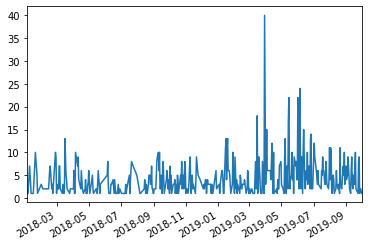

In [147]:
df_sorted['Date/Time'].value_counts(sort=False).plot(kind='line')

In [148]:
df_itworks = pd.crosstab(index=df_sorted['Date/Time'], columns=df_sorted['Branch'],values='Count', aggfunc=len)

In [149]:
df_itworks.tail()

Branch,EBR,RIV,Teen,WBR
Date/Time,,,,
2019-09-25,9.0,NaN,NaN,NaN
2019-09-26,1.0,NaN,NaN,NaN
2019-09-27,NaN,NaN,2.0,NaN
2019-09-28,2.0,NaN,NaN,NaN
2019-09-30,1.0,NaN,NaN,NaN


In [150]:
df_fillna = df_itworks.fillna(0)

In [151]:
df_fillna.head()

Branch,EBR,RIV,Teen,WBR
Date/Time,,,,
2018-01-04,1.0,0.0,0.0,0.0
2018-01-05,1.0,0.0,0.0,0.0
2018-01-06,1.0,0.0,0.0,0.0
2018-01-09,7.0,0.0,0.0,0.0
2018-01-12,1.0,0.0,0.0,0.0


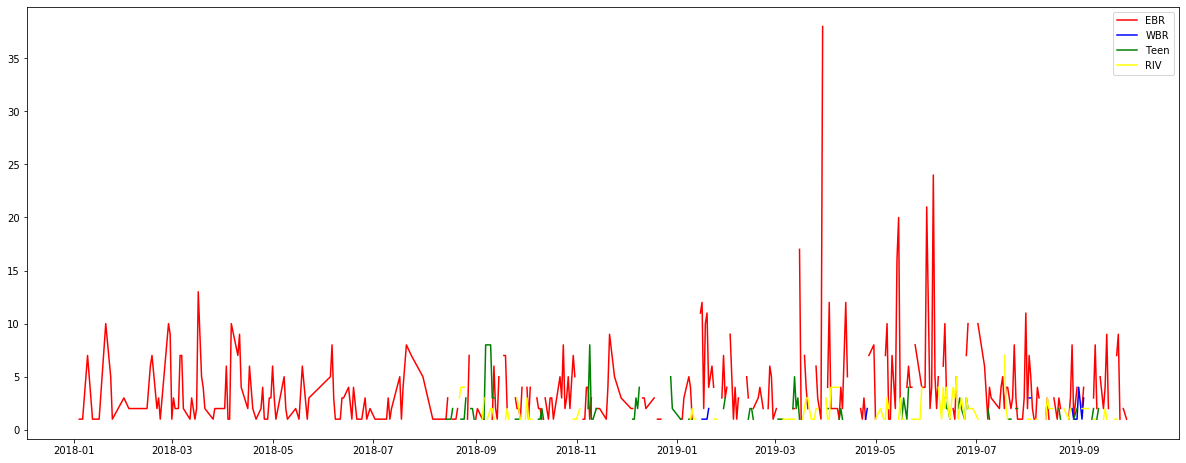

In [152]:
fig = plt.figure(figsize=(16,6))

ax = fig.add_axes([0,0,1,1])

ax.plot(df_fillna.index, df_itworks['EBR'], color='red', label="EBR")
ax.plot(df_fillna.index, df_itworks['WBR'], color='blue', label="WBR")
ax.plot(df_fillna.index, df_itworks['Teen'], color='green', label="Teen")
ax.plot(df_fillna.index, df_itworks['RIV'], color='yellow', label="RIV")

ax.legend()

In [153]:
df_sorted.groupby(['Branch']).sum()

,Material Used (kg),Real print time (h),Estimated print time (h),Material Cost ($)
Branch,,,,
EBR,25.719,2468.78,2486.03,1283.47
RIV,8.755,1288.57,1313.80,438.54
Teen,4.128,395.14,392.13,206.16
WBR,2.322,247.01,255.30,116.29


In [154]:
df_sorted.groupby(['Branch']).max()

,Date/Time,Material Used (kg),Real print time (h),Estimated print time (h),Material Cost ($)
Branch,,,,,
EBR,2019-09-30,0.264,22.24,23.16,13.22
RIV,2019-09-24,0.182,32.95,33.37,9.10
Teen,2019-09-27,0.140,13.15,14.14,6.98
WBR,2019-09-17,0.309,47.42,48.39,15.46


In [155]:
df_sorted.to_csv(path_or_buf='~/Desktop/ES-Misc/Data-Python/JPPL/New-Data/revised.csv')

In [156]:
df_test = df_sorted.reset_index(drop=True)

In [157]:
df_test.head()

,Date/Time,Material Used (kg),Real print time (h),Estimated print time (h),Material Cost ($),Branch
0,2018-01-04,0.007,0.72,0.65,0.36,EBR
1,2019-06-05,0.003,0.35,0.30,0.14,EBR
2,2019-03-30,0.003,0.32,0.35,0.13,EBR
3,2019-06-05,0.003,0.36,0.30,0.14,EBR
4,2018-07-31,0.018,1.89,1.89,0.90,EBR


In [158]:
columns_1 = ['Date','Material','Real','Est','Cost','Branch']
df_test.columns = columns_1

In [161]:
df_test.set_index('Date', inplace=True)

In [166]:
df_test.to_csv(path_or_buf='~/Desktop/ES-Misc/Data-Python/JPPL/New-Data/new_cols.csv')